

# Failed Bank USA 2008-2023
 # Connecting SQL server database using pyodbc
 # Combining tables
 # Visualization 


# Using pyodbc tables  were querried and joined 

### New df is formed and converted into csv

### And finally csv is visualized  

In [351]:
pip install pyodbc

Note: you may need to restart the kernel to use updated packages.


In [352]:
import pyodbc
import pandas as pd 

In [353]:
# SQL Server connection details
server = 'DESKTOP-47670JH\SQLSERVER2019'
database = 'Failed Bank USA'
username = 'Gajendra Poudel'
password = 'Gajendra123*'


In [354]:
# Establish the SQL Server connection
connection = pyodbc.connect(
    f'DRIVER={{SQL Server Native Client 11.0}};SERVER={server};DATABASE={database};UID={username};PWD={password}'
)

In [355]:
 #Create a cursor object
cursor = connection.cursor()

In [356]:
# Execute the SQL query
cursor.execute("SELECT [Bank_Name] FROM DF1banklist")

# Fetch all the rows returned by the query
rows = cursor.fetchall()

# Iterate over the rows and print the values
for row in rows:
    print(row[0])  # Assuming the "Bank Name" column is the first column in the result set




Signature Bank
Silicon Valley Bank
Almena State Bank
First City Bank of Florida
The First State Bank
Ericson State Bank
City National Bank of New Jersey
Resolute Bank
Louisa Community Bank
The Enloe State Bank
Washington Federal Bank for Savings
The Farmers and Merchants State Bank of Argonia
Fayette County Bank
Guaranty Bank, (d/b/a BestBank in Georgia & Michigan)
First NBC Bank
Proficio Bank
Seaway Bank and Trust Company
Harvest Community Bank
Allied Bank
The Woodbury Banking Company
First CornerStone Bank
Trust Company Bank
North Milwaukee State Bank
Hometown National Bank
The Bank of Georgia
Premier Bank
Edgebrook Bank
Doral Bank
Capitol City Bank & Trust Company
Highland Community Bank
First National Bank of Crestview
Northern Star Bank
Frontier Bank, FSB D/B/A El Paseo Bank
The National Republic Bank of Chicago
NBRS Financial
GreenChoice Bank, fsb
Eastside Commercial Bank
The Freedom State Bank
Valley Bank
Valley Bank
Slavie Federal Savings Bank
Columbia Savings Bank
AztecAmerica

In [357]:
cursor = connection.cursor()

In [358]:
# query to inner join  , two tables located in sql server to make a combined df 
# containning 8 columns 

query = '''
SELECT DF3failedbankapi.Bank_Name, DF3failedbankapi.City, DF3failedbankapi.State, 
       DF3failedbankapi.Assets_millions, DF3failedbankapi.Deposits_millions, DF3failedbankapi.Estimated_Loss_millions, 
       DF1banklist.Acquiring_Institution, DF3failedbankapi.Closing_Date 
FROM DF3failedbankapi 
INNER JOIN DF1banklist ON DF3failedbankapi.Bank_Name = DF1banklist.Bank_Name;
'''






In [359]:
# executing querry 
cursor.execute(query)


In [360]:
results = cursor.fetchall()

In [361]:
#Create a DataFrame from the fetched results
df = pd.DataFrame.from_records(results, columns=columns)

In [362]:
print(df)

                         Bank_Name               City State  Assets_millions  \
0                   Signature Bank           New York    NY       110.360001   
1              Silicon Valley Bank        Santa Clara    CA       209.029999   
2                Almena State Bank             Almena    KS         0.070000   
3       First City Bank Of Florida  Fort Walton Beach    FL         0.140000   
4             The First State Bank      Barboursville    WV         0.150000   
..                             ...                ...   ...              ...   
523            First Priority Bank          Bradenton    FL         0.260000   
524  First National Bank Of Nevada               Reno    NV         3.410000   
525                      Hume Bank               Hume    MO         0.020000   
526         Douglass National Bank        Kansas City    MO         0.050000   
527               New Century Bank            Chicago    IL         0.450000   

     Deposits_millions  Estimated_Loss_

In [363]:
# df is exported to the directory as a csv file 

df.to_csv('Failed_Bank_USA.csv', index=False)


# Visualization Part 

In [364]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [365]:
df = pd.read_csv('Failed_Bank_USA.csv')  # Replace 'failed_bank_data.csv' with the actual file path or name


In [366]:
df.head(5)

,Bank_Name,City,State,Assets_millions,Deposits_millions,Estimated_Loss_millions,Acquiring_Institution,Closing_Date
0,Signature Bank,New York,NY,110.360001,88.610001,2.40,"Signature Bridge Bank, N.A.",2023-03-12
1,Silicon Valley Bank,Santa Clara,CA,209.029999,175.380005,16.10,"Silicon Valley Bridge Bank, N.A.",2023-03-07
2,Almena State Bank,Almena,KS,0.070000,0.060000,0.02,Equity Bank,2020-10-23
3,First City Bank Of Florida,Fort Walton Beach,FL,0.140000,0.130000,0.01,"United Fidelity Bank, fsb",2020-10-16
4,The First State Bank,Barboursville,WV,0.150000,0.140000,0.05,"MVB Bank, Inc.",2020-04-03


In [367]:
# Convert the 'Closing_Date' column to a datetime data type
df['Closing_Date'] = pd.to_datetime(df['Closing_Date'])

# Extract the year from the 'Closing_Date' and keep it as a string
df['Year'] = df['Closing_Date'].dt.strftime('%Y')

# Remove the 'Closing_Date' column if no longer needed
df.drop('Closing_Date', axis=1, inplace=True)


# ## Summary of bank failed 

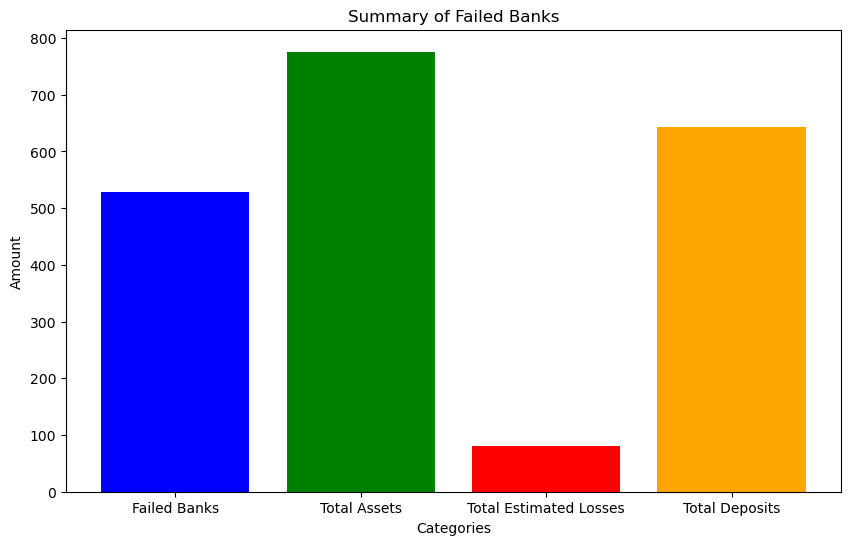

In [368]:


# Calculate the total number of failed banks
total_failed_banks = len(df)

# Calculate the total assets, total estimated losses, and total deposits
total_assets = df['Assets_millions'].sum()
total_estimated_losses = df['Estimated_Loss_millions'].sum()
total_deposits = df['Deposits_millions'].sum()

# Define colors for each bar
colors = ['blue', 'green', 'red', 'orange']

# Create a bar plot with different colors
categories = ['Failed Banks', 'Total Assets', 'Total Estimated Losses', 'Total Deposits']
values = [total_failed_banks, total_assets, total_estimated_losses, total_deposits]

plt.figure(figsize=(10, 6))
plt.bar(categories, values, color=colors)
plt.xlabel('Categories')
plt.ylabel('Amount')
plt.title('Summary of Failed Banks')
plt.show()


# Number of bank failed by state 

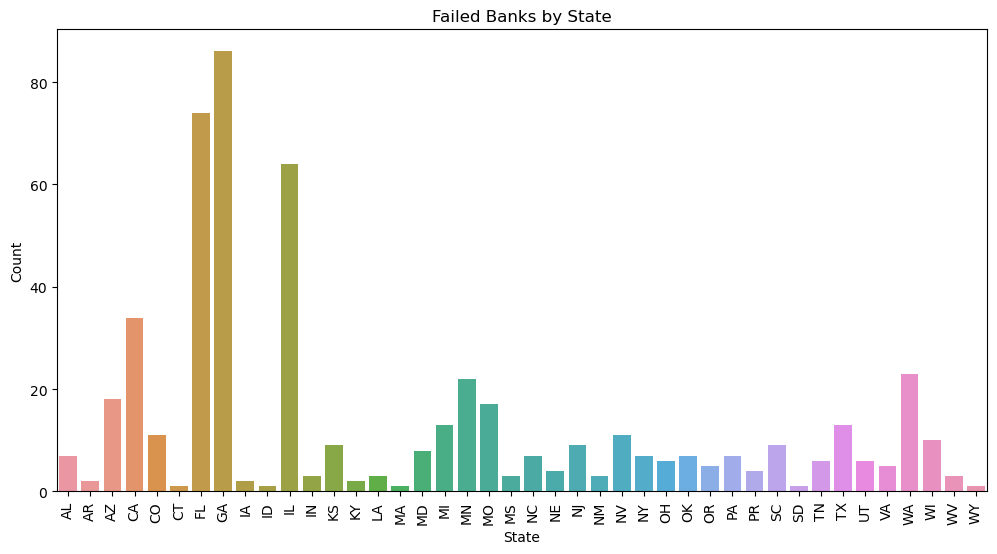

In [369]:
failed_banks_by_state = df['State'].value_counts().sort_index()
plt.figure(figsize=(12, 6))
sns.barplot(x=failed_banks_by_state.index, y=failed_banks_by_state.values)
plt.xlabel('State')
plt.ylabel('Count')
plt.title('Failed Banks by State')
plt.xticks(rotation=90)
plt.show()


# Total assests of Failed bank 

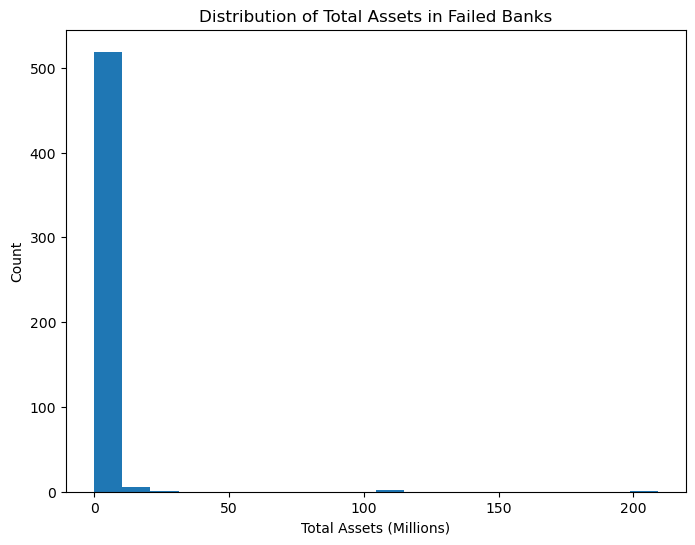

In [370]:
# Visualize the total assets in failed banks
plt.figure(figsize=(8, 6))
plt.hist(df['Assets_millions'], bins=20)
plt.xlabel('Total Assets (Millions)')
plt.ylabel('Count')
plt.title('Distribution of Total Assets in Failed Banks')
plt.show()

# State with higest number of failed bank 

In [371]:
# Identify the state with the highest number of failed banks
state_with_highest_failures = df['State'].value_counts().idxmax()
print('State with the highest number of failed banks:', state_with_highest_failures)


State with the highest number of failed banks: GA


# City with higest and lowest number of failed bank

In [372]:
# Identify the city with the lowest or highest number of failed banks
city_with_lowest_failed_bank = df['City'].value_counts().idxmin()
city_with_highest_failed_bank = df['City'].value_counts().idxmax()
print('City with the lowest number of failed banks:', city_with_lowest_failed_bank)
print('City with the highest number of failed banks:', city_with_highest_failed_bank)

City with the lowest number of failed banks: Lincoln
City with the highest number of failed banks: Chicago


# Failed bank by year (2008-2023)

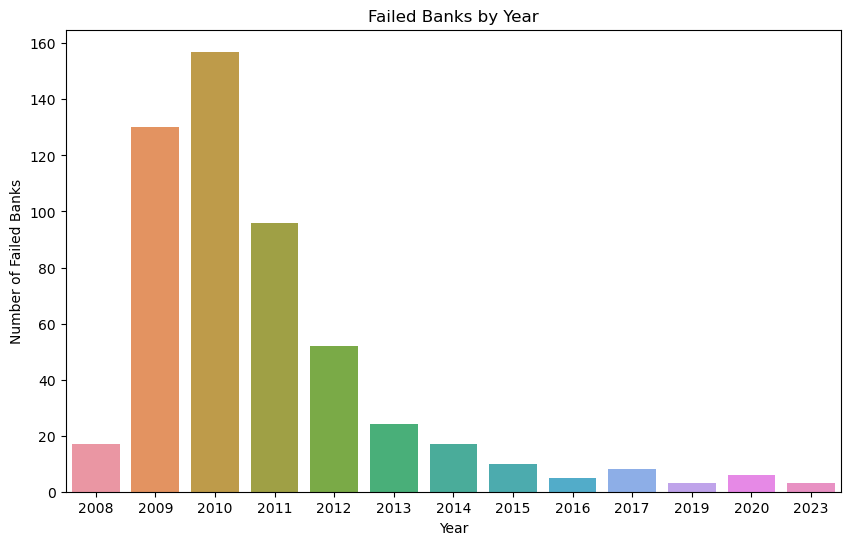

In [373]:

# Count the number of failed banks for each year
failed_banks_by_year = df['Year'].value_counts().sort_index()

# Create a bar plot of failed banks by year
plt.figure(figsize=(10, 6))
sns.barplot(x=failed_banks_by_year.index, y=failed_banks_by_year.values)
plt.xlabel('Year')
plt.ylabel('Number of Failed Banks')
plt.title('Failed Banks by Year')
plt.show()


# Assest  vs Deposits of failed bank scatter plot 

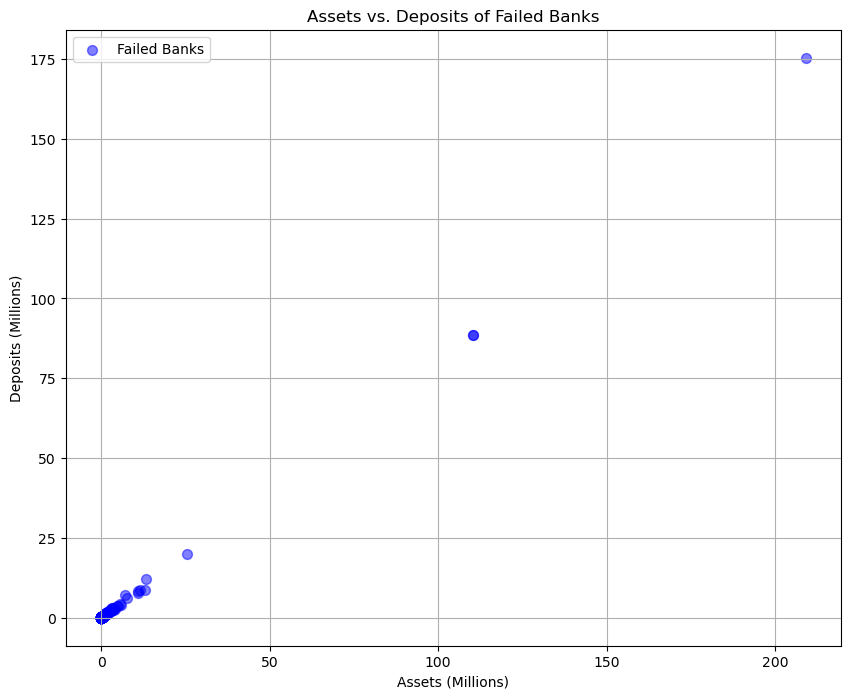

In [375]:
plt.figure(figsize=(10, 8))
plt.scatter(df['Assets_millions'], df['Deposits_millions'], s=50, c='blue', alpha=0.5)
plt.xlabel('Assets (Millions)')
plt.ylabel('Deposits (Millions)')
plt.title('Assets vs. Deposits of Failed Banks')
plt.grid(True)
plt.legend(['Failed Banks'])
plt.show()
